In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Optimization

In [2]:
from scipy.optimize import minimize

Minimize
$$f(x) = (x-3)^2$$

In [6]:
def f(x):
    return (x-3)**2

initial_guess = 2
res = minimize(f,initial_guess)
res.x

array([2.99999999])

Minimize $$f(x,y)=(x-1)^2 + (y-2.5)^2$$

$$x - 2y + 2 \ge 0$$
$$-x - 2y + 6 \ge 0$$
$$-x + 2y + 2 \ge 0$$
$$x \ge 0$$
$$y \ge 0$$

In [15]:
f = lambda x: (x[0] - 1)**2 + (x[1]-2.5)**2
cons = ({'type':'ineq','fun':lambda x:x[0]-2*x[1]+2},
       {'type':'ineq','fun':lambda x:-x[0]-2*x[1]+6},
        {'type':'ineq','fun':lambda x:-x[0]+2*x[1]+2}
       )

bounds = ((0,None),(0,None))
res = minimize(f,(2,0),bounds=bounds,constraints=cons)
res.x

array([1.4, 1.7])

In [16]:
minimize?

# Interpolation

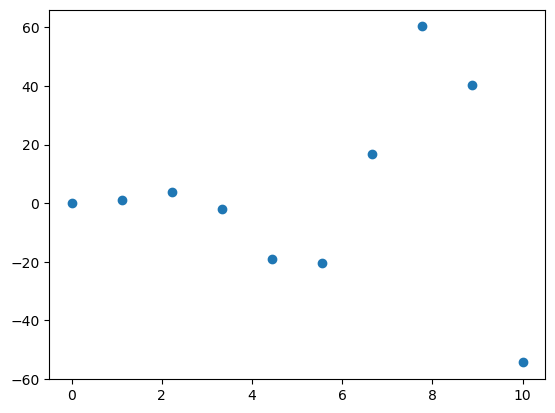

In [18]:
x = np.linspace(0,10,10)
y = x**2*np.sin(x)
plt.scatter(x,y)

In [19]:
from scipy.interpolate import interp1d

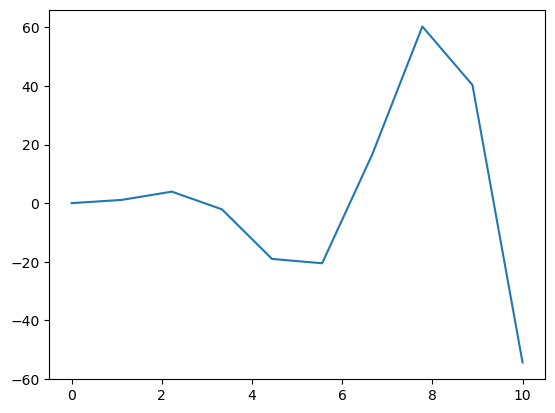

In [24]:
f = interp1d(x,y,kind='linear')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense,y_dense)

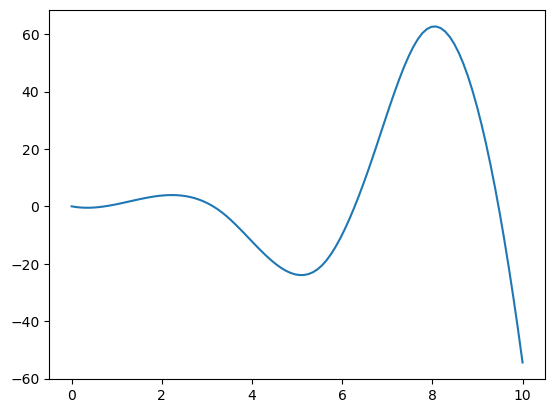

In [25]:
f = interp1d(x,y,kind='cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense,y_dense)

# Curve Fitting

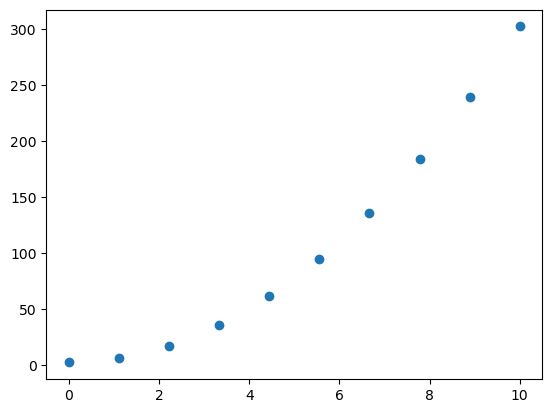

In [29]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data,y_data)

In [31]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2 + b

initial_guess = (1,1)
popt,pcov= curve_fit(func,x_data,y_data,initial_guess)

In [32]:
popt

array([3., 2.])

# Calculus

# Differentation

In [37]:
from scipy.misc import derivative

In [38]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)

In [39]:
x = np.linspace(0,1,100)

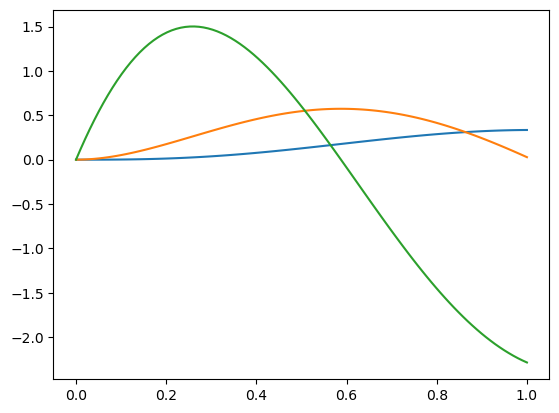

In [42]:
plt.plot(x,f(x))
plt.plot(x,derivative(f,x,dx=1e-6))
plt.plot(x,derivative(f,x,dx=1e-6,n=2))

# Integration

$$  \int_{0}^{1} x^2sin(2x)e^{-x} \,dx $$

In [43]:
from scipy.integrate import quad

In [44]:
integrand = lambda x:x**2 * np.sin(2*x) * np.exp(-x)
integral,integral_error = quad(integrand,0,1)

In [45]:
integral

0.14558175869954834

In [46]:
integral_error

1.6162822047366225e-15

$$  \int_{0}^{1}\int_{-x}^{x^2} sin(x+y^2) \,dydx $$

In [48]:
from scipy.integrate import dblquad

In [49]:
integrand = lambda x,y:np.sin(x+y**2)
lw_y = lambda x:-x
upr_y = lambda x:x**2
integral,integral_error = dblquad(integrand,0,1,lw_y,upr_y)

In [50]:
integral

0.315802507240474

In [51]:
integral_error

1.5634600713498928e-14

# Differential Equation

$$v' - \alpha v^2 + \beta = 0 \\ v(0)=0$$

In [53]:
from scipy.integrate import odeint

In [54]:
def dvdt(v,t):
    return 3*v**2 - 5

In [55]:
v0 = 0

In [59]:
t = np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)
sol.T

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

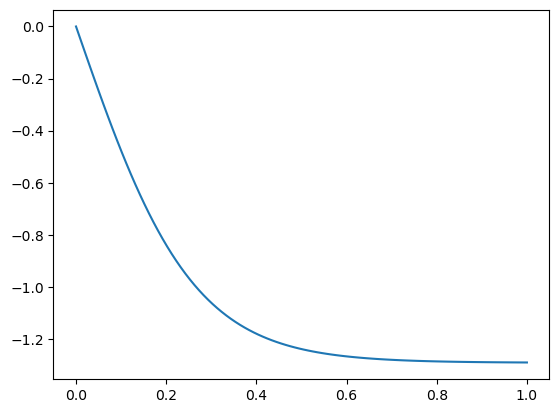

In [60]:
plt.plot(t,sol)

### Couple first order ODE

$$
y_1' = y_1 + y_2^2 + 3x  \enspace y_1(0) = 0\\
y_2' = 3y_1+y_2^3-cos(x) \enspace  y_2(0) = 0$$

In [68]:
def dSdx(S,x):
    y1,y2=S
    return [
        y1+y2**2+3*x,
        3*y1+y2**3-np.cos(x)
    ]

In [69]:
y1_0 = 0
y2_0 = 0
S_0 = (y1_0,y2_0)

In [70]:
x = np.linspace(0,1,100)
sol = odeint(dSdx,S_0,x)

In [73]:
y1 = sol.T[0]
y2 = sol.T[1]

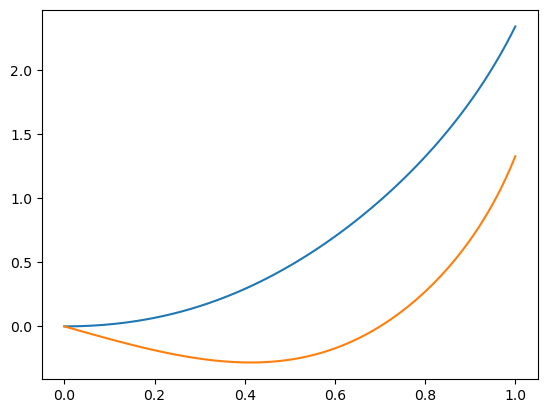

In [74]:
plt.plot(x,y1)
plt.plot(x,y2)

## Second Order ODE

$$
\theta'' - sin(\theta) = 0 \\
d\omega/dt = sin(\theta) \\
d\theta/dt = \omega \\
$$

Let $$S = (\theta,\omega)$$

In [75]:
def dSdt(S,t):
    theta,omega = S
    return [omega,np.sin(theta)]

In [76]:
theta0 = np.pi/4
omega0 = 0
S0 = (theta0,omega0)

In [77]:
t = np.linspace(0,20,100)
sol = odeint(dSdt,S0,t)
theta,omega=sol.T

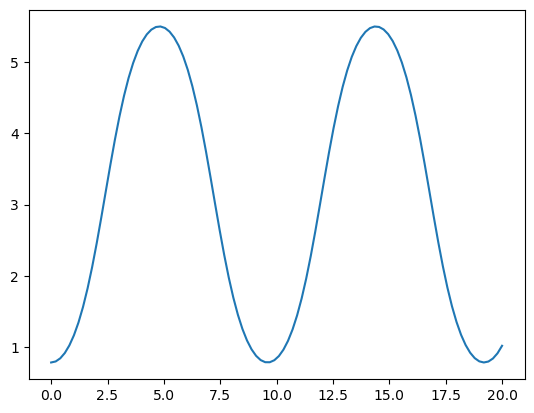

In [78]:
plt.plot(t,theta)
plt.show()

## Linear Algebra

$$\begin{bmatrix}
3 & 0 & 0 & 0\\
2 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 1 & 1 & 1\\
\end{bmatrix} \overrightarrow{x}
=
\begin{bmatrix}
4\\
2\\
4\\
2\\ 
\end{bmatrix}
$$

In [79]:
from scipy.linalg import solve_triangular

In [82]:
a = np.array([[3,0,0,0],
              [2,1,0,0],
              [1,0,1,0],
              [1,1,1,1]
             ])
b = np.array([4,2,4,2])
x = solve_triangular(a,b,lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

## Eigenvalue Problems

In [83]:
from scipy.linalg import eigh_tridiagonal

$$\begin{bmatrix}
3 & -` & 0 & 0\\
-1 & 3 & -1 & 0\\
0 & -1 & 3 & -1\\
0 & 0 & -1 & 3\\
\end{bmatrix} \overrightarrow{x}
=
\lambda x
$$

In [85]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w,v = eigh_tridiagonal(d,e)

In [86]:
w

array([1.38196601, 2.38196601, 3.61803399, 4.61803399])

In [87]:
v

array([[ 0.37174803,  0.60150096,  0.60150096, -0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803,  0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803, -0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096,  0.37174803]])